In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt

# Part 1

In [2]:
# Loading in the data
# Quick tutorial of Pandas : https://pandas.pydata.org/pandas-docs/stable/10min.html
# Other tutorial : https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
file_path = os.path.expanduser('~/Documents/GitHub/ee219/Project 4/network_backup_dataset.csv')
df = pd.read_csv(file_path)

In [3]:
# Preprocessing data by adding a 'Day #' column
def days_to_num(day_of_week):
    days_to_num_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
    
    num = []
    for i in xrange(0, len(day_of_week)):
        num.append(days_to_num_map[day_of_week[i]])
    return num

# Day number = 7*(Week # - 1)  + days_of_week
# There are a total of  105 days. 
df['Day #'] = 7*(df['Week #'] - 1) + days_to_num(df['Day of Week'])
max(df['Day #'])

105L

## Section 1.a

In [4]:
# Extracting the first 20 days
twenty_day_period = df[df['Day #'].map(lambda i : i <= 20)]

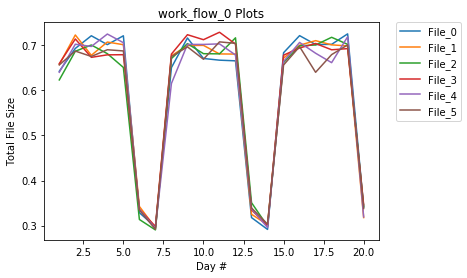

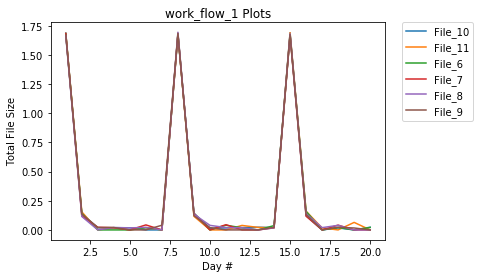

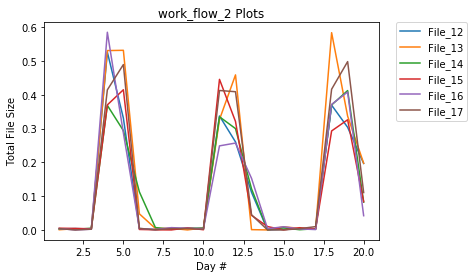

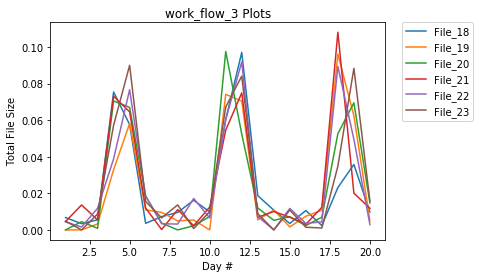

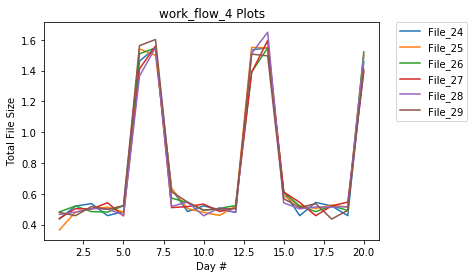

In [5]:
# Grouping all the work-flow-ids together
x = range(1,21,1)
for wfID, wfGrouped in twenty_day_period.groupby('Work-Flow-ID'):
    
    plt.figure()
    plt.title('%s Plots' % wfID)
    plt.xlabel('Day #')
    plt.ylabel('Total File Size')
    
    # Grouping all the files in the work-flow together
    for fID, fGrouped in wfGrouped.groupby('File Name'):
        
        # Grouping all the days in the work-flow togeter and summing it up
        sum_by_day = fGrouped.groupby('Day #').sum()
        
        # Plot
        plt.plot(x, sum_by_day['Size of Backup (GB)'], label=fID)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
        

## Section 1.b

In [6]:
# Extracting the first 105 days
first_105_days = df[df['Day #'].map(lambda i : i <= 105)]

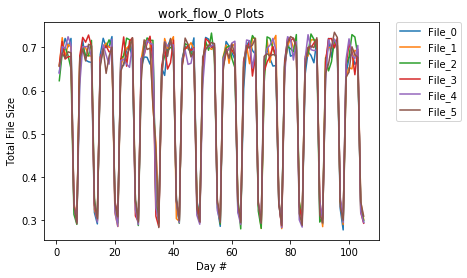

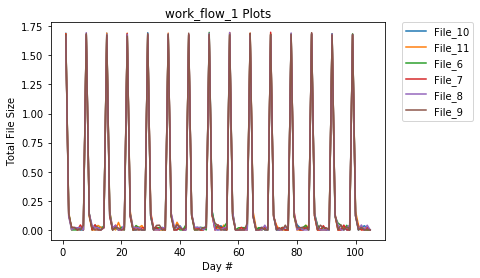

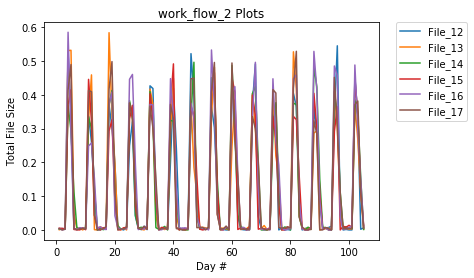

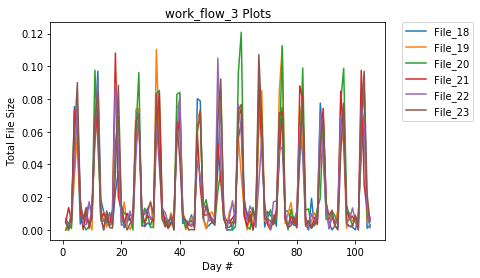

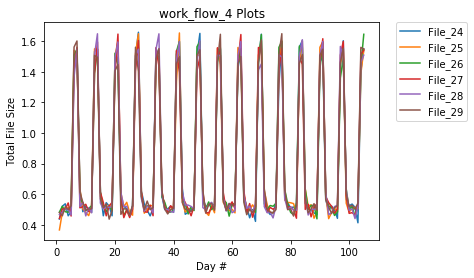

In [7]:
# Grouping all the work-flow-ids together
x = range(1,106,1)
for wfID, wfGrouped in first_105_days.groupby('Work-Flow-ID'):
    
    plt.figure()
    plt.title('%s Plots' % wfID)
    plt.xlabel('Day #')
    plt.ylabel('Total File Size')
    
    # Grouping all the files in the work-flow together
    for fID, fGrouped in wfGrouped.groupby('File Name'):
        
        # Grouping all the days in the work-flow togeter and summing it up
        sum_by_day = fGrouped.groupby('Day #').sum()
        
        # Plot
        plt.plot(x, sum_by_day['Size of Backup (GB)'], label=fID)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 

# Part 2

## Section 2.a.i

In [8]:
# part i: Converting each each catorgoical feature into 1D values
df_1d = pd.read_csv(file_path)
df_1d.drop('Backup Time (hour)', axis = 1) # We do not use backup time in prediction
def underscore_str_to_num(str_array):
    num = []
    for i in xrange(0,len(str_array)):
        val = [int(s) for s in str_array[i].split('_') if s.isdigit()]
        num.append(val[0]) ## We do this so we get a scalar not an array of 1
    return num
    
df_1d['Day of Week'] = days_to_num(df_1d['Day of Week'])
df_1d['Work-Flow-ID'] = underscore_str_to_num(df_1d['Work-Flow-ID'])
df_1d['File Name'] = underscore_str_to_num(df_1d['File Name'])

In [9]:
x = ['Week #','Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID','File Name']
y = ['Size of Backup (GB)']

linReg = LinearRegression()
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)

for trainIndex, testIndex in kf.split(df_1d):
    
    # Set up training data
    x_trainSet = df_1d.loc[trainIndex, lambda df_1d : x]
    y_trainSet = df_1d.loc[trainIndex, lambda df_1d : y]
    
    # Set up testing data
    x_testSet = df_1d.loc[testIndex, lambda df_1d : x]
    y_testSet = df_1d.loc[testIndex, lambda df_1d : y] # actual
    
    # Train model using traingin sets
    linReg.fit(x_trainSet, y_trainSet)
    
    # Print Coefficient
    print 'Coefficients: \n', linReg.coef_
    
    # Print intercepts
    print 'Intercepts: \n', linReg.intercept_
    
    # Make predictions using the testing set
    y_pred_train = linReg.predict(x_trainSet)
    y_pred_test = linReg.predict(x_testSet)
    
    # Calculating RMSE
    print 'RMSE for Training Data: ', sqrt(mean_squared_error(y_trainSet, y_pred_train))
    print 'RMSE for Testing Data: ', sqrt(mean_squared_error(y_testSet, y_pred_test))
    
    print '\n'
    

Coefficients: 
[[  1.14604376e-04  -2.50427272e-03   1.37751442e-03   2.07174386e-03
    3.36569666e-05]]
Intercepts: 
[ 0.05036489]
RMSE for Training Data:  0.103382893155
RMSE for Testing Data:  0.105460260415


Coefficients: 
[[  4.18606649e-05  -2.44670424e-03   1.38713597e-03   4.47889665e-04
    3.89632739e-04]]
Intercepts: 
[ 0.04907986]
RMSE for Training Data:  0.1045839349
RMSE for Testing Data:  0.094202727197


Coefficients: 
[[  2.89427838e-05  -2.52831687e-03   1.38675625e-03   2.80028093e-03
   -5.20657476e-05]]
Intercepts: 
[ 0.05066073]
RMSE for Training Data:  0.103307013209
RMSE for Testing Data:  0.106112780282


Coefficients: 
[[ -7.89307242e-05  -2.20337633e-03   1.36535290e-03   2.00813578e-03
    1.52293948e-04]]
Intercepts: 
[ 0.0493826]
RMSE for Training Data:  0.103279210883
RMSE for Testing Data:  0.106366735576


Coefficients: 
[[ -1.28672212e-06  -2.31389252e-03   1.37330576e-03   3.88441570e-03
   -1.77745783e-04]]
Intercepts: 
[ 0.05007351]
RMSE for Train

In [10]:
# Best model
# Coefficients: 
# [[ -1.22911375e-05  -2.70081112e-03   1.39102708e-03   2.49802359e-03
#    -4.00793801e-05]]
# Intercepts: 
# [ 0.05256043]
# RMSE for Training Data:  0.10486952719
# RMSE for Testing Data:  0.0913109232862


x_param = df_1d.loc[: , lambda df_1d : x]
y_actual = (df_1d.loc[: , lambda df_1d : y]).as_matrix()

B = np.asmatrix([ -1.22911375e-05,  -2.70081112e-03,   1.39102708e-03,   2.49802359e-03, -4.00793801e-05])
intercept = 0.05256043

# Model Estimate
y_pred = np.asmatrix(x_param.as_matrix()* np.transpose(B) + intercept)
y_pred = np.squeeze(np.asarray(y_pred)) # Converting numpy matrix to numpy array


In [11]:
# Overall RMSE
print 'RMSE: ', sqrt(mean_squared_error(y_actual, y_pred))

# Calculating residual
residual = np.zeros(y_actual.shape) # Need to allocate or Heap problem
residual = (y_actual - np.transpose(np.asmatrix(y_pred)))

RMSE:  0.103594106531


In [12]:
residual = np.squeeze(np.asarray(residual))

In [13]:
print residual

[-0.05123835 -0.05575345 -0.05571337 ...,  0.12694045  0.12789801
  0.12948838]


Text(0,0.5,u'Fitted')

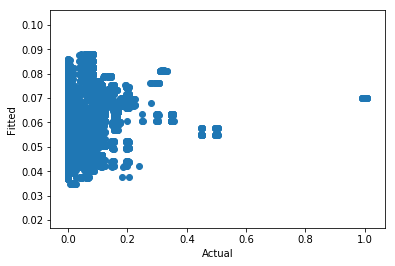

In [14]:
plt.figure()
plt.scatter(x=y_actual, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Fitted')



(-0.13581924721319999, 0.9888013454237462)

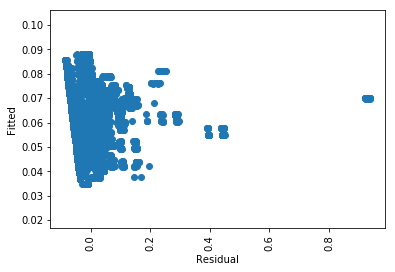

In [15]:
plt.figure()
plt.xticks(rotation='vertical')
plt.scatter(x=residual, y=y_pred)
plt.xlabel('Residual')
plt.ylabel('Fitted')
plt.xlim((min(residual) - 0.05, max(residual) +0.05))

## Section 2.a.ii

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
# Satndarizing all the features Function
features = df_1d.loc[ : , lambda df_1d : x]
scaler = StandardScaler()
scaler.fit(features)
features_fitted = scaler.transform(features)


In [18]:
x = ['Week #','Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID','File Name']
y = ['Size of Backup (GB)']

linReg = LinearRegression()
kf = KFold(n_splits = 10)#, shuffle = True, random_state = 42)

for trainIndex, testIndex in kf.split(features_fitted):
    print trainIndex.shape
    print testIndex.shape
#     # Set up training data
#     x_trainSet = features_fitted[trainIndex]
#     y_trainSet = df_1d.loc[trainIndex, lambda df_1d : y]
#     # Set up testing data
#     x_testSet = features_fitted[testIndex]
#     y_testSet = df_1d.loc[testIndex, lambda df_1d : y] # actual
    
#     # Train model using traingin sets
#     linReg.fit(x_trainSet, y_trainSet)
    
#     # Print Coefficient
#     print 'Coefficients: \n', linReg.coef_
    
#     # Print intercepts
#     print 'Intercepts: \n', linReg.intercept_
    
#     # Make predictions using the testing set
#     y_pred_train = linReg.predict(x_trainSet)
#     y_pred_test = linReg.predict(x_testSet)
    
#     # Calculating RMSE
#     print 'RMSE for Training Data: ', sqrt(mean_squared_error(y_trainSet, y_pred_train))
#     print 'RMSE for Testing Data: ', sqrt(mean_squared_error(y_testSet, y_pred_test))
    
#     print '\n'

(16729,)
(1859,)
(16729,)
(1859,)
(16729,)
(1859,)
(16729,)
(1859,)
(16729,)
(1859,)
(16729,)
(1859,)
(16729,)
(1859,)
(16729,)
(1859,)
(16730,)
(1858,)
(16730,)
(1858,)


Text(0,0.5,u'Fitted')

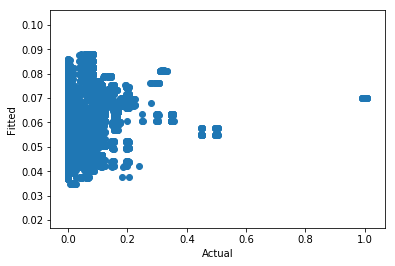

In [19]:
plt.figure()
plt.scatter(x=y_actual, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Fitted')


(-0.13581924721319999, 0.9888013454237462)

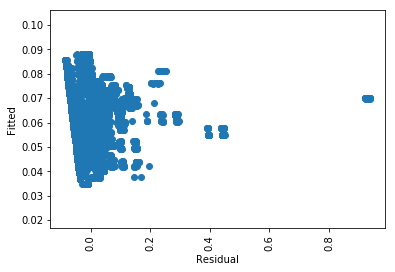

In [20]:
plt.figure()
plt.xticks(rotation='vertical')
plt.scatter(x=residual, y=y_pred)
plt.xlabel('Residual')
plt.ylabel('Fitted')
plt.xlim((min(residual) - 0.05, max(residual) +0.05))

## Section 2.a.iii

 Check out http://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py 
 
## F-Test
http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression
- Captures linear dependency
- The higher it is the most discriminative feature it is

## MI
http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression
- capture any kind of dependency between variables
- The higher it is the most discriminative feature it is

In [21]:
from sklearn.feature_selection import f_regression, mutual_info_regression
## Selecting the feature according to the video
# Outputs F values of features in array (F-test)
# Outputs p-values of F
FTest, _ = f_regression(features_fitted, y_actual.ravel())

In [22]:
mi = mutual_info_regression(features_fitted, y_actual.ravel())

In [23]:
print FTest
print mi

[  8.45006257e-03   3.88163798e+01   1.50740934e+02   2.61386654e+01
   2.53200943e+01]
[ 0.00235849  0.23715144  0.30018273  0.76669438  0.76431672]


In [24]:
## Now run test again without the features that suck 

In [25]:
print df_1d.shape

(18588, 7)


## Section 2.a.iv

In [26]:
## Preprocessing features
from sklearn.preprocessing import OneHotEncoder

In [27]:
for i in xrange(0,32):
    print get_enc_index(i)

NameError: name 'get_enc_index' is not defined

In [28]:

features = df_1d.loc[ : , lambda df_1d : x]

In [29]:
# Iterate through encoders

def get_bit(byteval,idx):
    return ((byteval&(1<<idx))!=0)

def get_enc_index(val):
    index = []
    for i in xrange(0,5):
        if(get_bit(val, i)):
            index.append(i)
            
    return index

# Do all scalar separate (val = 0).  < -- done in part i
for i in xrange(1, 32, 1):
    print i
    categorical_features = get_enc_index(i)
    enc = OneHotEncoder(categorical_features=categorical_features)
    enc.fit(features)
    enc_features = enc.transform(features).toarray()
    
    
    # do rest of shit

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [30]:
print enc.transform(df_1d.loc[:, lambda df_1d: x]).toarray()
print enc.n_values_ 

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[16  8 22  5 30]


## Section 2.a.v

Check github for example : https://github.com/AgentCyrusJr/EE219/blob/master/Project1/p1p2ridge.py

### Ridge Regularizer
We will use RidgeCV to find best coefficient:
 http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
 
 Why ? Iterates through different alpha values which we need 
 
 ## Ridge 
 http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
 just ridge. You should have optimal alpha already. 

In [39]:
# Ridge Regularizer: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

from sklearn.linear_model import RidgeCV

# Example from github
tuningAlpha = [1, 0.1, 0.01, 0.001]
ridge = RidgeCV(normalize=True, alphas=tuningAlpha, cv=10)
ridge.fit(features, y_actual)
prediction = ridge.predict(features)
print "optimal alpha: ", ridge.alpha_
print "optimal coefficients: ", ridge.coef_


optimal alpha:  0.1
optimal coefficients:  [[  1.55483645e-05  -2.16054197e-03   1.24293493e-03   1.44870846e-03
    1.79863966e-04]]




## Lasso Regularizer
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

* Give mean square error!!!!  
    mse_path_ : array, shape (n_alphas, n_folds)
    mean square error for the test set on each fold, varying alpha

check github: https://github.com/AgentCyrusJr/EE219/blob/master/Project1/p1p2lasso.py

In [32]:
from sklearn.linear_model import LassoCV

tuningAlpha = [1, 0.1, 0.01, 0.001]
lasso = LassoCV(normalize=True, alphas=tuningAlpha, cv=10)
lasso.fit(features,y_actual.ravel())
prediction = lasso.predict(features)	
print "optimal alpha: ", lasso.alpha_
print "optimal coefficients: ", lasso.coef_
print "mse: ", lasso.mse_path_ # Shape of this is (n_alphas, n_folds)

optimal alpha:  1.0
optimal coefficients:  [ 0. -0.  0.  0.  0.]
mse:  [[ 0.01148548  0.01015866  0.01149958  0.01019814  0.01156286  0.01021817
   0.01154812  0.01022192  0.01154845  0.01011469]
 [ 0.01148548  0.01015866  0.01149958  0.01019814  0.01156286  0.01021817
   0.01154812  0.01022192  0.01154845  0.01011469]
 [ 0.01148548  0.01015866  0.01149958  0.01019814  0.01156286  0.01021817
   0.01154812  0.01022192  0.01154845  0.01011469]
 [ 0.01148548  0.01015866  0.01149958  0.01019814  0.01156286  0.01021817
   0.01154812  0.01022192  0.01154845  0.01011469]]


# Part B

## Random Forest Regression: 
https://github.com/pranavtbhat/EE219/blob/master/project1/task2b.py

Set the parameters of your model with the following initial values.
• Number of trees: 20 # n_estimators in the function
• Depth of each tree: 4
• Bootstrap: True
• Maximum number of features: 5

*****Recall that a Random Forest model can handle categorical variables without
having to use one-hot or scalar encodings.

Explanation: https://medium.com/@Synced/how-random-forest-algorithm-works-in-machine-learning-3c0fe15b6674 
Video: https://zh.coursera.org/learn/python-machine-learning/lecture/lF9QN/random-forests

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 20, max_depth = 4, bootstrap = True, max_features = 5, oob_score = True)
rfr.fit(features, y_actual.ravel())
prediction = rfr.predict(features)
# TA says this warning is okay: https://piazza.com/class/jcifzza0hzs2f3?cid=217

In [34]:
print prediction

[ 0.07724025  0.00081661  0.00081661 ...,  0.18319726  0.18319726
  0.18319726]


## Section 2.b.i

In [35]:
print rfr.oob_score_ # Out of Bag error (Just take this once with the whole dataset)
print rfr.oob_prediction_

0.657274154883
[ 0.07749724  0.00080012  0.00083638 ...,  0.18251467  0.18327582
  0.18344068]


## Section 2.b.ii

In [ ]:
## Just do 2 for loops of the first one. 
for maxFeatures in xrange(1, 6, 1):
    for nTrees in xrange(1,201, 1):
    

## Section 2.b.iii
* Lets pick depths? <---
* Min_sample_split?


## Section 2.b.iv

In [36]:
rfr.feature_importances_ # (the higher, the more important the feature)

array([  5.69463707e-06,   2.71140921e-01,   1.50044649e-01,
         1.85957505e-01,   3.92851230e-01])

## Section 2.b.v
Visualization from https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

In [37]:
print rfr.estimators_[1]

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=5,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1434538641, splitter='best')


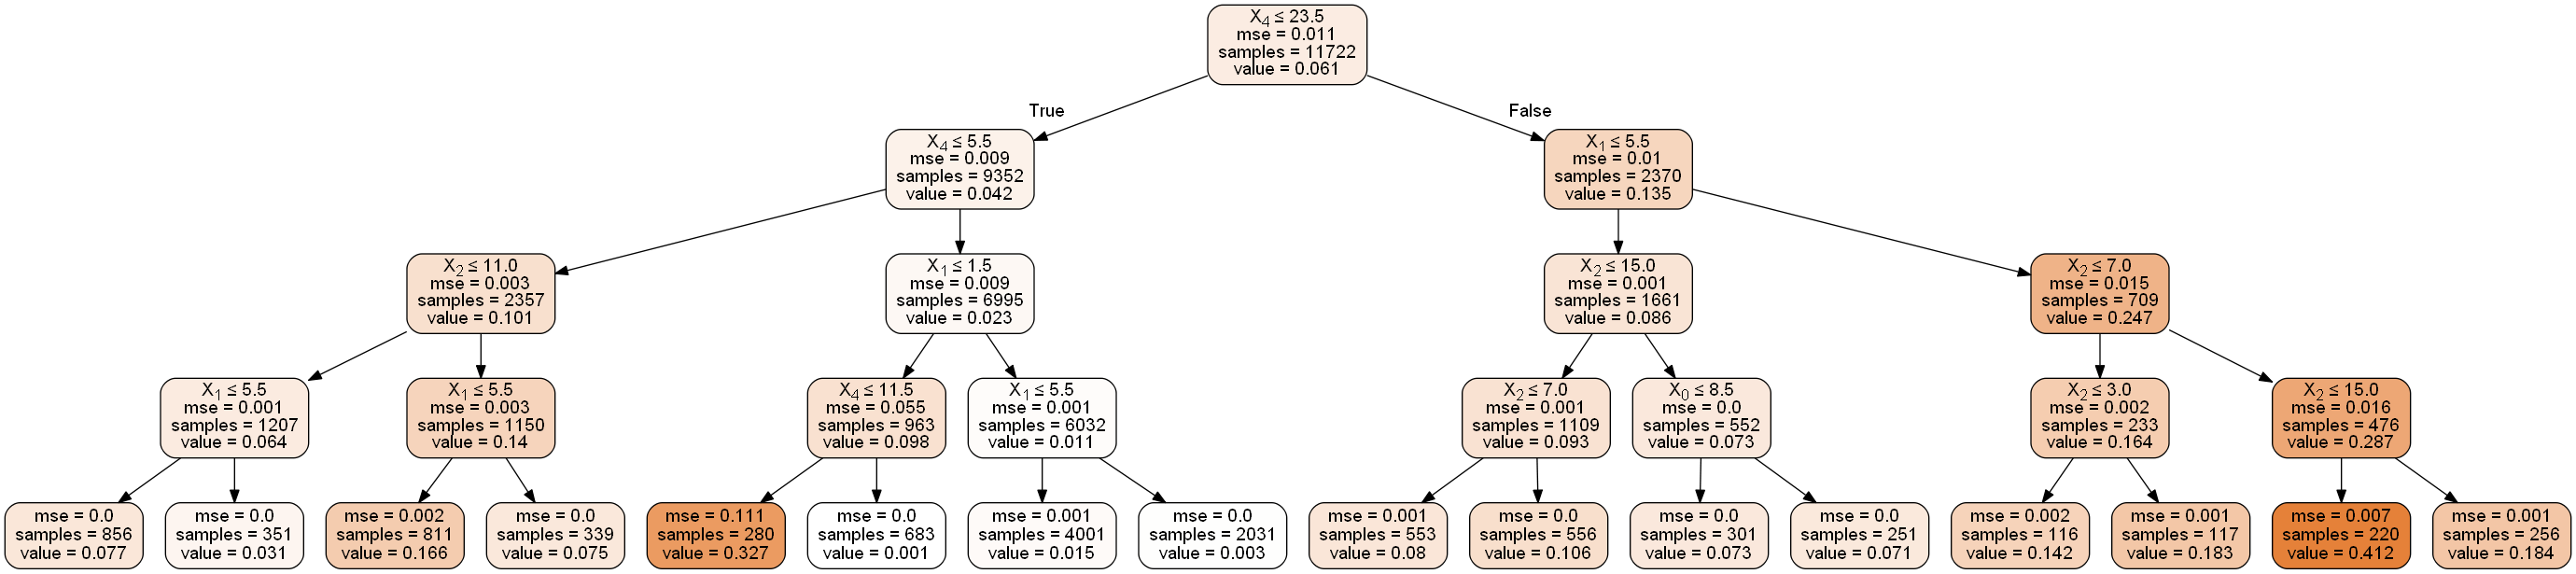

In [38]:
# Visualizing from https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
from sklearn.externals.six import StringIO  
from IPython.display import Image 
import graphviz
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(rfr.estimators_[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Part C
http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

*****all features one-hot encoded

Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. **** Use Standard Scaler()

https://stackoverflow.com/questions/10565868/multi-layer-perceptron-mlp-architecture-criteria-for-choosing-number-of-hidde
This link discuss how to pick your hidden layer size

In [40]:
from sklearn.neural_network import MLPRegressor
activityFcnArr = ['relu', 'logistic', 'tanh']
# Range for hidden _layer_sizes we would need to figure out, we can check 1-10 and incremenet if we feel the need to

## ADD STANDARD SCALAR
nn = MLPRegressor(hidden_layer_sizes = 1, activation = activityFcnArr[0])

In [ ]:
nn.fit(features, y_actual.ravel()) 
nn.predict(features)

In [42]:
# do one hot encoding for all features

for activityFcn in activityFcnArr:
    for hls in xrange(1,11, 1): #hls = hidden layer sizes
        nn = MLPRegressor(hidden_layer_sizes = hls, activation = activityFcn)
        ## Do the 10 folds test while keeping the testing RMSE for each size
        
    # Plot activityFcn (look at part 1 for ideas how to plot in same graph)
    # The plots should be x-axis = size #, y-axis should be Testing RMSE
    # Store or print min_RMSE for which size
    
## Now again, plot best model of actual and predicted
        


# Part 2D

In [50]:
## i
# Change df_1d accordingly
for wfID, wfGrouped in df_1d.groupby('Work-Flow-ID'):
    # Run regression. See if fit improves.
    print wfGrouped.index

Int64Index([    0,    12,    13,    14,    15,    16,    42,    43,    44,
               45,
            ...
            18548, 18549, 18550, 18551, 18576, 18577, 18578, 18579, 18580,
            18581],
           dtype='int64', length=3687)
Int64Index([   17,    18,    19,    20,    21,    22,    48,    49,    50,
               51,
            ...
            18530, 18532, 18533, 18534, 18558, 18559, 18560, 18561, 18562,
            18563],
           dtype='int64', length=3600)
Int64Index([    1,     2,     3,     4,     5,    23,    30,    31,    32,
               33,
            ...
            18538, 18539, 18544, 18545, 18565, 18566, 18570, 18572, 18574,
            18575],
           dtype='int64', length=3741)
Int64Index([    6,     7,     8,     9,    10,    11,    35,    36,    37,
               38,
            ...
            18540, 18541, 18542, 18543, 18564, 18567, 18568, 18569, 18571,
            18573],
           dtype='int64', length=3780)
Int64Index([   24,    25

In [45]:
# ii
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 2)
pf.fit(features)
poly_features = pf.transform(features)
print poly_features

[[   1.    1.    1. ...,    0.    0.    0.]
 [   1.    1.    1. ...,    4.   24.  144.]
 [   1.    1.    1. ...,    4.   26.  169.]
 ..., 
 [   1.   15.    7. ...,   16.  104.  676.]
 [   1.   15.    7. ...,   16.  100.  625.]
 [   1.   15.    7. ...,   16.   96.  576.]]


In [ ]:
# Yes, you are expected to use scalar encoded features for polynomial transformation, one hot encoding is meaningless for polynomial transformation. Each task is separate, you don't need to standardize features in other questions.
## Change ploynomial features from 2 to 10
    # iterate through different workflows

# Part 2 E
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html


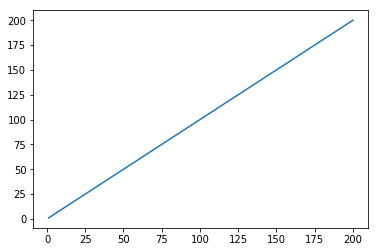

In [49]:
# Just using scaler encoding
# Changing parameters for k-means
maxFeature = 1
plt.plot(range(1,201, 1), range(1, 201,1), label = ('Feature # '+str(maxFeature)))